In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv
/kaggle/input/facial-keypoints-detection/test.zip


# Data Extraction and Preparation

In [3]:
# unzip dataset
!unzip /kaggle/input/facial-keypoints-detection/training.zip 
!unzip /kaggle/input/facial-keypoints-detection/test.zip

Archive:  /kaggle/input/facial-keypoints-detection/training.zip
  inflating: training.csv            
Archive:  /kaggle/input/facial-keypoints-detection/test.zip
  inflating: test.csv                


In [4]:
lookup = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

# Load train and test data
train_csv = pd.read_csv('/kaggle/working/training.csv')
test_csv = pd.read_csv('/kaggle/working/test.csv')

# See how many records and varibales in train dataset and test dataset
train_csv.shape, test_csv.shape

((7049, 31), (1783, 2))

we can see that train dataset has 7049 records and 31 columns

In [5]:
lookup.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [6]:
test_csv.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [7]:
train_csv.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [8]:
# identify if there are null values in training dataset

train_csv.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [9]:
# Fill the NA value with interpolation
train_csv = train_csv.interpolate()
train_csv.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [10]:
train_csv.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [11]:
# the 'Image' column contains values for pixels
# what we need to do is convert data type from strings to float
# and reshape the array to (96,96,1)
# then we can get images for training - x_train

def image_preprocess(data): 
    images = []
    for index, row in data.iterrows():
        image_str = row['Image']
        image_arr = np.array(image_str.split(' '), dtype = float)
        image_arr = np.array(image_arr.reshape((96,96,1)))
        images.append(image_arr)
    return images

In [12]:
# to get labels for training, we need to extract the keypoints

def keypoints(data):
    keypoint = data.drop('Image',axis = 1)
    keypoint_features = []
    for index, keypoints in keypoint.iterrows():
        keypoint_features.append(keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

In [13]:
x_train = np.array(image_preprocess(train_csv))
y_train = np.array(keypoints(train_csv))
x_test = np.array(image_preprocess(test_csv))

In [14]:
x_train.shape, y_train.shape, x_test.shape

((7049, 96, 96, 1), (7049, 30), (1783, 96, 96, 1))

<function matplotlib.pyplot.show(close=None, block=None)>

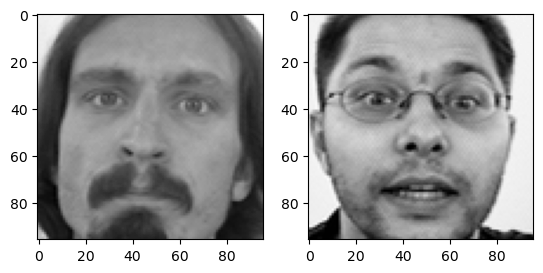

In [15]:
# visualize train and test images

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(x_train[0], cmap = 'gray')
axs[1].imshow(x_test[0], cmap = 'gray')
plt.show

# Build the Model 

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

In [17]:
model = Sequential([Conv2D(32,(5,5), activation = 'relu', padding = 'same', input_shape = (96,96,1)),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Conv2D(64,(5,5), activation = 'relu', padding = 'same'),
                    Dropout(0.1),
                    BatchNormalization(),
                    MaxPooling2D(2,2), 
                    Conv2D(128,(3,3), activation = 'relu', padding = 'same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2), 
                    Conv2D(256,(3,3), activation = 'relu', padding = 'same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2), 
                    Dropout(0.1),
                    Conv2D(256,(3,3), activation = 'relu', padding = 'same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dropout(0.2),
                    Dense(30)
                   ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        51264     
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       2

# Compile the Model

In [18]:
from keras.optimizers import Adam
from keras.losses import mean_squared_error

model.compile(optimizer = Adam(learning_rate = 0.001),
                        loss = mean_squared_error, 
                        metrics = ['accuracy'])

# Train the Model

In [19]:
history = model.fit(x_train, y_train,
          epochs = 30, 
          batch_size = 64,
          validation_split = 0.2)

Epoch 1/30
89/89 [==============================] - 168s 2s/step - loss: 190.8219 - accuracy: 0.5210 - val_loss: 69.2067 - val_accuracy: 0.6660
Epoch 2/30
89/89 [==============================] - 166s 2s/step - loss: 12.1618 - accuracy: 0.6015 - val_loss: 29.8000 - val_accuracy: 0.6759
Epoch 3/30
89/89 [==============================] - 165s 2s/step - loss: 10.3744 - accuracy: 0.6680 - val_loss: 36.8811 - val_accuracy: 0.6993
Epoch 4/30
89/89 [==============================] - 166s 2s/step - loss: 9.2787 - accuracy: 0.7134 - val_loss: 49.4196 - val_accuracy: 0.7277
Epoch 5/30
89/89 [==============================] - 165s 2s/step - loss: 8.7639 - accuracy: 0.7239 - val_loss: 6.9039 - val_accuracy: 0.7128
Epoch 6/30
89/89 [==============================] - 165s 2s/step - loss: 7.7383 - accuracy: 0.7422 - val_loss: 22.1607 - val_accuracy: 0.7319
Epoch 7/30
89/89 [==============================] - 165s 2s/step - loss: 7.1707 - accuracy: 0.7553 - val_loss: 9.1864 - val_accuracy: 0.7574
Epoc

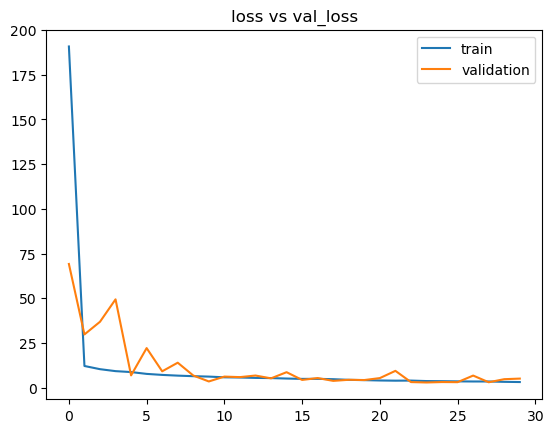

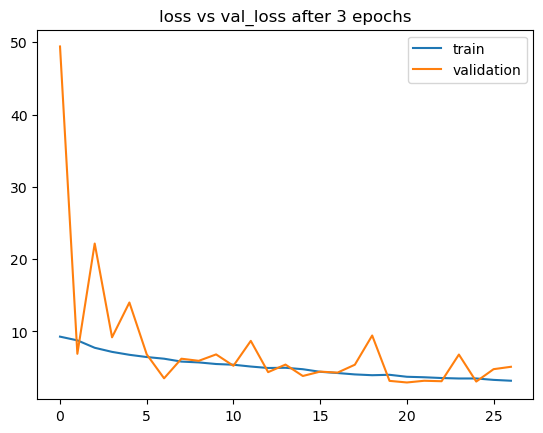

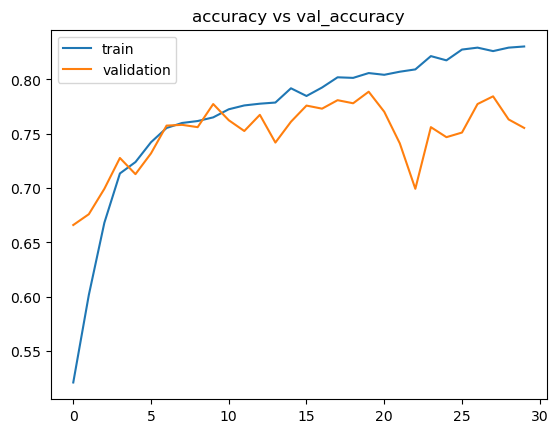

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs val_loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'][3:])
plt.plot(history.history['val_loss'][3:])
plt.title('loss vs val_loss after 3 epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs val_accuracy')
plt.legend(['train', 'validation'])
plt.show()

Training loss and validation loss are decreasing while training accuracy and validation accuracy are increasing - signs of good fit. 

# Predictions

In [21]:
y_test = model.predict(x_test)

56/56 [==============================] - 11s 196ms/step


In [22]:
feature_names = list(lookup['FeatureName'])
image_ids = list(lookup['ImageId']-1)
row_ids = list(lookup['RowId'])

feature_list = []
for feature in feature_names:
    feature_list.append(feature_names.index(feature))
    
    
predictions = []
for x,y in zip(image_ids, feature_list):
    predictions.append(y_test[x][y])

    
row_ids = pd.Series(row_ids, name = 'RowId')
locations = pd.Series(predictions, name = 'Location')
locations = locations.clip(0.0,96.0)
submission_result = pd.concat([row_ids,locations],axis = 1)
submission_result.to_csv('submission.csv',index = False)